# NoteBook to Make Descriptives

This notebook is for looking at final population zonal stats data

In [1]:
from rasterstats import zonal_stats
import rasterio
import geopandas as gpd
import operator
import numpy as np
import pandas as pd
import matplotlib 
import seaborn as sns

# Functions

In [ ]:
def city_search(gpd_df, city_list, country):
    """ function will print out city name and population for a subset of a gridded dataset gpd
    requires data frame, list of cities, and country of interest
    """
    gpd_df_sub = gpd_df[gpd_df['country'] == country]
    
    for index, row in gpd_df_sub.iterrows():
        for city in city_list:
            if row['city'] == city:
                print(city)
                print(round(row['PopTot']))

# Data

In [2]:
# File paths

data_raw = '/Users/cascade/Github/NTL/data/raw/'
data_temp = '/Users/cascade/Github/NTL/temp_data/'
data_interim = '/Users/cascade/Github/NTL/data/interim/'
ms_data = '/Users/cascade/Github/NTL/temp_data/MS_Data/'
erl_data = '/Users/cascade/Github/NTL/temp_data/ERL_data/'
downloads = '/Users/cascade/Downloads/'

In [3]:
# Data

GHS2000 = gpd.read_file(erl_data+'GHS_POP_GPW42000_final20190122.shp')
GHS2015 = gpd.read_file(erl_data+'GHS_POP_GPW42015_final20190122.shp')
WP2000 = gpd.read_file(erl_data+'AFR_PPP_2000_adj_v2_final20190122.shp')
WP2015 = gpd.read_file(erl_data+'AFR_PPP_2015_adj_v2_final20190122.shp')
LS2015 = gpd.read_file(erl_data+'WPE_1KM_2016_final20190122.shp')
WPE2016 = gpd.read_file(erl_data+'LS15_final20190122.shp')

In [ ]:
datasets = [GHS2000, GHS2015, WP2000, WP2015, LS2015, WPE2016]

# Analysis

In [11]:
# osm check

#WP2015_drop = WP2015.drop_duplicates('osm_id', keep=True) 
# WP2015.duplicated(subset='osm_id', keep='first')
#WP2015.tail(20)


In [12]:
# WP2015.head(2)

,osm_id,FID,country,city,osm_type,lat,lon,PopTot,aez_class,geometry
0,89369215,11918,Algeria,Tamanrasset,town,22.785454,5.532446,31706.562439,Tropic - cool / arid,"POLYGON ((5.499583 22.81625, 5.541249 22.81625..."
1,89980948,10871,Algeria,In Salah,town,27.195033,2.482613,23489.852142,Subtropic - warm / arid,"POLYGON ((2.474583 27.224584, 2.482916 27.2245..."


In [49]:
# Make a unique ID for reach osm point based on lat long because I fucked up when I ran the polypoints analysis ... 
# go back and fix for ERL 

WPE2016['lat_string'] = WPE2016.lat.astype(str)
WPE2016['lon_string'] = WPE2016.lon.astype(str)
WPE2016['str_id'] = WPE2016.lat.astype(str)+WPE2016.lon.astype(str)
WPE2016.head(2)


,osm_id,FID,country,city,osm_type,lat,lon,PopTot,aez_class,geometry,lat_string,lon_string,str_id
0,89369215,14962,Algeria,Tamanrasset,town,22.785454,5.532446,101883.0,Tropic - cool / arid,"POLYGON ((5.516667 22.816667, 5.533333 22.8166...",22.7854543,5.5324465,22.78545435.5324465
1,89980948,14115,Algeria,In Salah,town,27.195033,2.482613,19993.0,Subtropic - warm / arid,"POLYGON ((2.466667 27.216667, 2.483333 27.2166...",27.1950331,2.4826132,27.19503312.4826132


In [50]:
# drop duplicated osm lat/lon combos

WPE2016_drop = WPE2016.drop_duplicates('str_id', keep='first') 
#WP2015.duplicated(subset='osm_id', keep='first')
print(WPE2016.shape)
print(WPE2016_drop.shape)

(5552, 13)
(5540, 13)


In [24]:
LS2015['lat_string'] = LS2015.lat.astype(str)
LS2015['lon_string'] = LS2015.lon.astype(str)
LS2015['str_id'] = LS2015.lat.astype(str)+LS2015.lon.astype(str)
LS2015_drop = LS2015.drop_duplicates('str_id', keep='first') 
print(LS2015.shape)
print(LS2015_drop.shape)

(5598, 13)
(5584, 13)


In [82]:
#dupsA = pd.concat(g for _, g in WPE2016.groupby("str_id") if len(g) > 1)
#dupsA

In [ ]:
urban_concat = pd.concat([GHS2015, GHS2000,  WP2015, WP2000])


In [ ]:
ax = sns.boxplot(x = 'PopTot', y = 'dataset', data = urban_concat)
ax.set(xscale="log")

In [ ]:
ax = sns.boxplot(x = 'PopTot', y = 'aez_class', data = WP2000)
ax.set(xscale="log")

In [ ]:
ax = sns.boxplot(x = 'PopTot', y = 'aez_class', data = WP2015)
ax.set(xscale="log")

In [ ]:
WP2015_drop = WP2015.drop_duplicates('FID', keep=False)
WPE2016_drop = WPE2016.drop_duplicates('FID', keep=False)
print(WP2015.shape)
print(WPE2016.shape)
print(WP2015_drop.shape)
print(WPE2016_drop.shape)

In [53]:
df_merge = pd.merge(WPE2016_drop[['str_id', 'PopTot']], WP2015_drop[['str_id', 'PopTot']], on='str_id', how = 'inner')
print(WP2015.shape)
print(WPE2016.shape)
print(df_merge.shape)


(3854, 13)
(5552, 13)
(3482, 3)


In [88]:
x = df_merge['PopTot_x']
y = df_merge['PopTot_y']
str_id_merge = df_merge['str_id']
test_df = pd.DataFrame()
test_df['x'] = x
test_df['y'] = y
test_df['str_id_merge'] = str_id_merge



test_df['x_string'] = test_df.x.astype(str)
test_df['y_string'] = test_df.y.astype(str)
test_df['str_id'] = test_df.x_string.astype(str)+test_df.y_string.astype(str)

In [95]:
test_df_drop = test_df.drop_duplicates('str_id', keep='last')
print(test_df_drop.shape)
print(test_df.shape)

(2576, 6)
(3482, 6)


In [90]:
dupsA = pd.concat(g for _, g in test_df.groupby("str_id") if len(g) > 1)
dupsA

,x,y,str_id_merge,x_string,y_string,str_id
2295,10001.0,7.416477e+03,4.9762574-2.3194533,10001.0,7416.476867675781,10001.07416.476867675781
2296,10001.0,7.416477e+03,4.967695-2.322883,10001.0,7416.476867675781,10001.07416.476867675781
1395,10120.0,8.289496e+03,14.762911535.9821977,10120.0,8289.496032714844,10120.08289.496032714844
1396,10120.0,8.289496e+03,14.74408440000000235.9729141,10120.0,8289.496032714844,10120.08289.496032714844
575,101343.0,2.254025e+06,36.698716210.1693727,101343.0,2254025.271299422,101343.02254025.271299422
639,101343.0,2.254025e+06,36.67402029999999510.1552994,101343.0,2254025.271299422,101343.02254025.271299422
2884,101527.0,6.367952e+04,27.03315410000000414.4316929,101527.0,63679.521087646484,101527.063679.521087646484
2903,101527.0,6.367952e+04,27.03733859999999814.4253234,101527.0,63679.521087646484,101527.063679.521087646484
1728,10375462.0,8.297575e+06,-4.296860215.2513016,10375462.0,8297575.42497921,10375462.08297575.42497921
3243,10375462.0,8.297575e+06,-4.269440715.2712256,10375462.0,8297575.42497921,10375462.08297575.42497921


Text(0,0.5,'World Pop 2015')

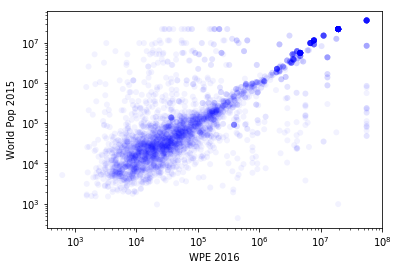

In [54]:
import matplotlib.pyplot as plt

#matplotlib.pyplot.scatter(df_merge['PopTot_x'], df_merge['PopTot_y'])

fig = plt.figure()
ax = plt.gca()
ax.scatter(df_merge['PopTot_x'] ,df_merge['PopTot_y'] , c='blue', alpha=0.05, edgecolors='none')
ax.set_yscale('log')
ax.set_xscale('log')
plt.xlabel('WPE 2016')
plt.ylabel('World Pop 2015')

Text(0,0.5,'World Pop 2015')

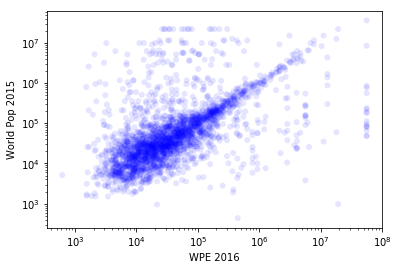

In [96]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(test_df_drop['x'], test_df_drop['y'], c='blue', alpha=0.1, edgecolors='none')
ax.set_yscale('log')
ax.set_xscale('log')
plt.xlabel('WPE 2016')
plt.ylabel('World Pop 2015')

In [92]:
from scipy import stats
xA = df_merge['PopTot_x']
yA = df_merge['PopTot_y']

result = stats.pearsonr(xA, yA) # return is (Pearson’s correlation coefficient, 2-tailed p-value)
result

(0.7515923590088722, 0.0)

In [97]:
from scipy import stats
xR = test_df_drop['x']
yR = test_df_drop['y']

result = stats.pearsonr(xR, yR) # return is (Pearson’s correlation coefficient, 2-tailed p-value)
result

(0.13368721168847358, 9.591111379092286e-12)

In [108]:
test_df_min = test_df_drop[test_df_drop['x']<=1000000]
print(len(test_df_min))
test_df_min = test_df_drop[test_df_drop['y']<=1000000]
print(len(test_df_min))

2453
2400


In [112]:
test_df_min[test_df_min['y']>=1000000]

,x,y,str_id_merge,x_string,y_string,str_id


In [113]:
xW = test_df_min['x']
yW = test_df_min['y']

result = stats.pearsonr(xW, yW) # return is (Pearson’s correlation coefficient, 2-tailed p-value)
result

(0.10726207788528529, 1.385116792324753e-07)

Text(0,0.5,'World Pop 2015')

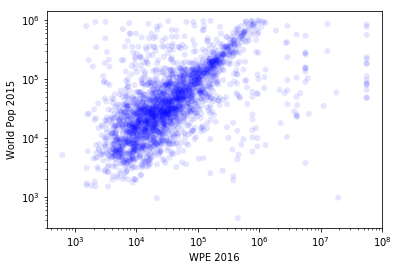

In [114]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(test_df_min['x'], test_df_min['y'], c='blue', alpha=0.1, edgecolors='none')
ax.set_yscale('log')
ax.set_xscale('log')
plt.xlabel('WPE 2016')
plt.ylabel('World Pop 2015')

# Old Code

In [ ]:
df_test_a = WP2015[['osm_id', 'PopTot']]


df_test_b = GHS2015[['osm_id', 'PopTot']]
print(df_test_b.shape)
print(df_test_a.shape)

df_test_a_drop = df_test_a.drop_duplicates('osm_id', keep=False)
df_test_b_drop = df_test_b.drop_duplicates('osm_id', keep=False)
print(df_test_b_drop.shape)
print(df_test_a_drop.shape)